## Анализ бизнес-показателей. Procrastinate Pro+

**Проблема:** в течение нескольких месяцев компания несет убытки, несмотря на вложения в рекламу;

**Задача:** проанализировать данные для поиска причин и найти пути решения проблемы;

**Период исследования:** 01.05.2019 - 27.10.2019;

**Представленные данные:**  
        - Лог сервера с данными о посещениях пользователей;  
        - Выгрузка заказов пользователей;  
        - Рекламные расходы.
        
**Необходимо изучить:**  
        - Откуда приходят пользователи и какими устройствами они пользуются;  
        - Стоимость привлечения пользователей из разных рекламных каналов;  
        - Доход с каждого клиента;  
        - Когда расходы на привличение клиента окупаются;  
        - Какие факторы мешают привлечению клиентов.

### Загрузите данные и подготовьте их к анализу

In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

**Посещения**

In [2]:
#посещения
visits = pd.read_csv('/datasets/visits_info_short.csv')
#заказы
orders = pd.read_csv('/datasets/orders_info_short.csv')
#рекламные расходы
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
#функция вывода информации
def information(dataset):
    return(
        print(
            display(dataset.head(10)),
            display(dataset.info()),
            display(dataset.describe(percentiles=[0.05, 0.1, 1/4, 1/2, 3/4, 0.9, 0.95, 0.99]).T),
            "Явные дубликаты:", dataset.duplicated().sum()))
                   

In [4]:
#вывод информации о посещениях
information(visits)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
5,90242400005,United States,iPhone,RocketSuperAds,2019-05-01 07:14:52,2019-05-01 08:19:56
6,43958116050,United States,Android,organic,2019-05-01 09:03:21,2019-05-01 10:08:39
7,185365244969,United States,iPhone,organic,2019-05-01 09:37:03,2019-05-01 10:00:43
8,446013509831,United States,iPhone,RocketSuperAds,2019-05-01 10:26:00,2019-05-01 10:59:17
9,100970711362,United States,Mac,TipTop,2019-05-01 04:39:53,2019-05-01 04:57:05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,99%,max
User Id,309901.0,4.997664e+11,2.887899e+11,599326.0,5.031155e+10,9.956322e+10,2.493691e+11,4.989906e+11,7.495211e+11,8.998143e+11,9.505046e+11,9.901352e+11,9.999996e+11


None None None Явные дубликаты: 0


`User Id` - id пользователя;  
`Region` - страна пользователя;  
`Device` - тип устройства пользователя;  
`Channel` - индентификатор источника перехода;  
`Session Start` - дата и время начала сессии;  
`Session End` - дата и время окончания сессии.

Пропусков и явных дубликатов нет, но требуется приведение названий столбцов к нижнему регистру, а также изменение типа данных полей, хранящих информацию о дате и времени

In [5]:
#копируем исходный датасет
df_visits=visits.copy()
df_visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [6]:
#переименование стоблцов в посещениях
df_visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

In [7]:
#изменение формата данных для даты и времени
df_visits['session_start'] = pd.to_datetime(df_visits['session_start'])
df_visits['session_end'] = pd.to_datetime(df_visits['session_end'])

In [8]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


**Заказы**

In [9]:
#вывод информации о заказах
information(orders)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
5,129100331057,2019-05-01 01:56:28,4.99
6,626807144131,2019-05-01 02:39:21,4.99
7,914062168985,2019-05-01 02:02:18,4.99
8,769669137453,2019-05-01 03:39:47,4.99
9,434198630691,2019-05-01 18:16:50,5.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,99%,max
User Id,40212.0,4.990295e+11,2.860937e+11,599326.00,5.191118e+10,1.019246e+11,2.511324e+11,4.982840e+11,7.433327e+11,8.948778e+11,9.465675e+11,9.899986e+11,9.998954e+11
Revenue,40212.0,5.370608e+00,3.454208e+00,4.99,4.990000e+00,4.990000e+00,4.990000e+00,4.990000e+00,4.990000e+00,4.990000e+00,4.990000e+00,1.999000e+01,4.999000e+01


None None None Явные дубликаты: 0


`User Id` - id пользователя;  
`Event Dt` - дата и время покупки;  
`Revenue` - сумма заказа.

Пропусков и явных дубликатов нет, но требуется приведение названий столбцов к нижнему регистру

In [10]:
#копируем исходный датасет
df_orders=orders.copy()
df_orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [11]:
#переименование стоблцов в заказах
df_orders.columns = ['user_id', 'event_dt', 'revenue']

In [12]:
#изменение формата данных для даты и времени
df_orders['event_dt'] = pd.to_datetime(df_orders['event_dt'])

In [13]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


**Расходы**

In [14]:
#вывод информации о расходах
information(costs)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,99%,max
costs,1800.0,58.609611,107.740223,0.8,3.36,4.194,6.495,12.285,33.6,210.63,318.15,483.0,630.0


None None None Явные дубликаты: 0


`dt` - дата проведения рекламной компании;  
`Channel` - индентификатор рекламного источника;  
`costs` - расходы на эту компанию.

Пропусков и явных дубликатов нет, но требуется приведение названий столбцов к нижнему регистру

In [15]:
#копируем исходный датасет
df_costs=costs.copy()
df_costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [16]:
#переименование столбцов в заказах
df_costs.columns = ['dt', 'channel', 'costs']

In [17]:
#изменение формата данных для даты и времени
df_costs['dt'] = pd.to_datetime(df_costs['dt']).dt.date

In [18]:
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


#### Вывод

Была выполнена предобработка данных. Были выполнены следующие шаги:  
1. Были изучены массивы данных о посещениях клиентов, заказах, а также о расходах компании на рекламу;  
2. Дубликаты и неопределенные значения обнаружены не были;  
3. Названия столбцов были приведены в соответствии со snake_case.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [19]:
#функция для создания профилей пользователей
def get_profiles(sessions, orders, costs):
    #первые посещения
    profiles = (
        sessions.sort_values(by = ['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start':'first',
                'channel':'first',
                'device':'first',
                'region':'first'
                }
        )
               .rename(columns = {'session_start':'first_ts'})
               .reset_index()
    )
    
    profiles['dt'] = profiles['first_ts'].dt.date #дата первого посещения
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]') #первый день месяца, в который произошло посещение
    
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique()) #категория пользователей, совершивших заказ
    
    #количество уникальных пользователей
    new_users = (profiles.groupby(['dt', 'channel'])
                 .agg({'user_id':'nunique'})
                 .rename(columns={'user_id':'unique_users'})
                 .reset_index())
    
    ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    ad_costs ['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    profiles = profiles.merge(ad_costs[['dt', 'channel', 'acquisition_cost']],
                             on=['dt', 'channel'],
                             how='left')
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    return profiles

In [20]:
#функция для расчета Retention Rate
def get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=[], ignore_horizon=False,):
    #исключение пользователей, которые не достигли горизонта анализа
    dimensions=['payer'] +dimensions
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    #сырые данные
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(index=dims, columns='lifetime', values='user_id', aggfunc='nunique')
        cohort_sizes = (df.groupby(dims).agg({'user_id':'nunique'}).rename(columns={'user_id':'cohort_size'}))
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size']+list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    return result_raw, result_grouped, result_in_time

In [21]:
#функция для расчета конверсии
def get_conversion(
    profiles, purchases, observation_date, horizon_days, dimensions=[], ignore_horizon = False,):
    
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    first_purchases = (
        purchases.sort_values(by = ['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt':'first'})
        .reset_index())
    
    result_raw = result_raw.merge(first_purchases[['user_id', 'event_dt']], on = 'user_id', how = 'left')
    
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days
    
    if len(dimensions) == 0:
            result_raw['cohort'] = 'All users'
            dimensions = dimensions + ['cohort']
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(index=dims, columns='lifetime', values='user_id', aggfunc='nunique')
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (df.groupby(dims).agg({'user_id':'nunique'}).rename(columns={'user_id':'cohort_size'}))
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    return result_raw, result_grouped, result_in_time

In [22]:
#функция для расчета LTV и ROI
def get_ltv(profiles, purchases, observation_date, horizon_days, dimensions=[], ignore_horizon=False):
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days -1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left')
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(index=dims, columns='lifetime', values='revenue', aggfunc='sum')
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = df.groupby(dims).agg({'user_id':'nunique'}).rename(columns={'user_id':'cohort_size'})
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = cac.groupby(dims).agg({'acquisition_cost':'mean'}).rename(columns={'acquisition_cost':'cac'})
        
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac']+list(range(horizon_days))]
        return result, roi
    result_grouped, roi_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    return result_raw, result_grouped, result_in_time, roi_grouped, roi_in_time

In [23]:
#функция сглаживания
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

In [24]:
#функция для построения Retention Rate
def plot_retention(retention, retention_history, horizon, window=7):
    plt.figure(figsize=(15, 10))
    
    retention = retention.drop(columns=['cohort_size', 0])
    retention_history = retention_history.drop(columns=['cohort_size'])[[horizon-1]]
    
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All_users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])
    
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')
    
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(grid=True, ax=ax2)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')
    
    ax3 = plt.subplot(2,2,3)
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    filtered_data = retention_history.query('payer == True').pivot_table(
        index = 'dt', columns=columns, values=horizon-1, aggfunc='mean')
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания платящих пользователей на {}-й день'.format(horizon))
    
    ax4= plt.subplot(2, 2, 4, sharey=ax3)
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon-1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика удержания неплатящих пользователей на {}-й день'.format(horizon))
    
    plt.tight_layout()
    plt.show

In [25]:
#функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):
    plt.figure(figsize=(15,5))
    conversion = conversion.drop(columns=['cohort_size'])
    conversion_history = conversion_history.drop(columns=['cohort_size'])[[horizon-1]]
    
    ax1 = plt.subplot(1,2,1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')
    
    ax2 = plt.subplot(1,2,2, sharey=ax1)
    columns = [name for name in conversion_history.index.names if name not in ['dt']]
    filtered_data = conversion_history.pivot_table(index='dt', columns=columns, values=horizon-1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))
    
    plt.tight_layout()
    plt.show()

In [26]:
#функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
    plt.figure(figsize=(20,10))
    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon-1]]
    cac_history = roi_history[['cac']]
    
    roi=roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[[horizon-1]]
    
    ax1 = plt.subplot(2,3,1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')
    
    ax2 = plt.subplot(2,3,2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(index='dt', columns=columns, values=horizon-1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))
    
    ax3 = plt.subplot(2,3,3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(index='dt', columns=columns, values='cac', aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')
    
    ax4 = plt.subplot(2,3,4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')
    
    ax5 = plt.subplot(2,3,5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(index='dt', columns=columns, values=horizon-1, aggfunc='mean')
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))
    
    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Профили пользователей

In [27]:
profiles = get_profiles(df_visits, df_orders, df_costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


**Минимальная дата привлечения пользователей**

In [28]:
print(f'{profiles.first_ts.min()}')

2019-05-01 00:00:41


**Максимальная дата привлечения пользователей**

In [29]:
print(f'{profiles.first_ts.max()}')

2019-10-27 23:59:04


#### Распределение пользователей по странам

In [30]:
profiles.region.unique()

array(['United States', 'France', 'Germany', 'UK'], dtype=object)

In [31]:
users_by_region = (profiles.groupby('region')
                   .agg({'user_id':'nunique'}).reset_index()
                   .merge(
                       profiles[profiles['payer']==True].groupby('region')
                       .agg({'user_id':'nunique'}).reset_index(), on = 'region', how = 'left')
                  )
users_by_region.columns = ['region', 'total', 'payers']
users_by_region['payers_part'] = (users_by_region['payers']/users_by_region['total']).round(3)
users_by_region['total_part'] = (users_by_region['total']/sum(users_by_region['total'])).round(3)

users_by_region.sort_values('total', ascending=False)

,region,total,payers,payers_part,total_part
3,United States,100002,6902,0.069,0.667
2,UK,17575,700,0.040,0.117
0,France,17450,663,0.038,0.116
1,Germany,14981,616,0.041,0.100


Среди всей аудитории приложения наибольшую долю составляет США - 67%. Великобритания и Франция составляют по ~12%, а Германия - 10%.  

Наибольшая доля платящей аудитории по региону - США - 7%. Великобритания, Франция и Германия - по ~4%

#### Распределение типов устройств среди пользователей

In [32]:
profiles.device.unique()

array(['Mac', 'iPhone', 'PC', 'Android'], dtype=object)

In [33]:
users_by_device = (profiles.groupby('device')
                   .agg({'user_id':'nunique'}).reset_index()
                   .merge(
                       profiles[profiles['payer']==True].groupby('device')
                       .agg({'user_id':'nunique'}).reset_index(), on = 'device', how = 'left')
                  )
users_by_device.columns = ['device', 'total', 'payers']
users_by_device['payers_part'] = (users_by_device['payers']/users_by_device['total']).round(3)
users_by_device['total_part'] = (users_by_device['total']/sum(users_by_device['total'])).round(3)

users_by_device.sort_values('total', ascending=False)

,device,total,payers,payers_part,total_part
3,iPhone,54479,3382,0.062,0.363
0,Android,35032,2050,0.059,0.234
2,PC,30455,1537,0.050,0.203
1,Mac,30042,1912,0.064,0.200


Наибольшую долю пользователей составляют пользователи iPhone - 36%, затем пользователи Android - 23%, а пользователи компьютерной техники по 20%.  

Наибольшая доля платящей аудитории составляют пользователи iPhone и Mac - более 6% каждый. Среди пользователей Android доля платящей аудитории составляет ~6%. Среди пользователей PC платят 5%.

#### Распределение типов устройств пользователей по регионам

In [34]:
device_by_region = (profiles.pivot_table(index=['region', 'device'],
                                         values='user_id',
                                         aggfunc='nunique')
                    .reset_index()
                    .merge(profiles[profiles['payer']==True].groupby(['region', 'device'])
                       .agg({'user_id':'nunique'}).reset_index(), on = ['region', 'device'], how = 'left'))
device_by_region.columns = ['region', 'device', 'total', 'payers']
device_by_region


,region,device,total,payers
0,France,Android,5252,179
1,France,Mac,1838,82
2,France,PC,6940,268
3,France,iPhone,3420,134
4,Germany,Android,4440,182
5,Germany,Mac,1584,61
6,Germany,PC,5945,253
7,Germany,iPhone,3012,120
8,UK,Android,5141,202
9,UK,Mac,1778,63


Text(0.5, 1.0, 'Распределение пользователей различных устройств по регионам')

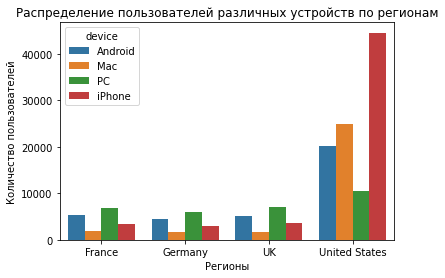

In [35]:
sns.barplot(data = device_by_region,
           x = 'region',
           y = 'total',
           hue = 'device')
plt.xlabel('Регионы')
plt.ylabel('Количество пользователей')
plt.title('Распределение пользователей различных устройств по регионам')

В Европе, среди пользователей приложения, наибольшую долю составляют пользователи Android и PC. В США наибольшую популярность имеют iPhone и Mac, из-за чего эти устройства имеют перевес в распределении устройств по пользователям, так как большинство аудитории представляют пользователи из США.

Text(0.5, 1.0, 'Распределение платящих пользователей различных устройств по регионам')

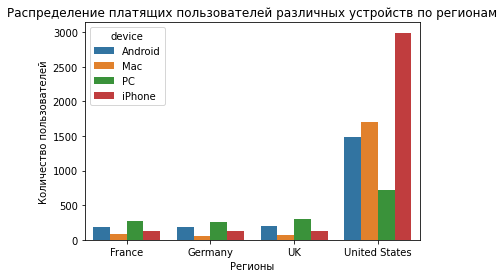

In [36]:
sns.barplot(data = device_by_region,
           x = 'region',
           y = 'payers',
           hue = 'device')
plt.xlabel('Регионы')
plt.ylabel('Количество пользователей')
plt.title('Распределение платящих пользователей различных устройств по регионам')

В Европе, среди пользователей приложения, наибольшую долю составляют пользователи Android и PC. В США наибольшую популярность имеют iPhone и Mac, из-за чего эти устройства имеют перевес в распределении устройств по пользователям, так как большинство аудитории представляют пользователи из США. Распределение платящих пользователей имеет тот же характер, что и всех.

#### Распределение пользователей по рекламным каналам

In [37]:
profiles.channel.unique()

array(['FaceBoom', 'organic', 'AdNonSense', 'YRabbit', 'MediaTornado',
       'RocketSuperAds', 'LeapBob', 'TipTop', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [38]:
channel_users = profiles
users_by_channel = (profiles.groupby('channel')
                   .agg({'user_id':'nunique'}).reset_index()
                   .merge(
                       profiles[profiles['payer']==True].groupby('channel')
                       .agg({'user_id':'nunique'}).reset_index(), on = 'channel', how = 'left')
                  )
users_by_channel.columns = ['channel', 'total', 'payers']
users_by_channel['payers_part'] = (users_by_channel['payers']/users_by_channel['total']).round(3)
users_by_channel['total_part'] = (users_by_channel['total']/sum(users_by_channel['total'])).round(3)

users_by_channel.sort_values('total', ascending=False)

,channel,total,payers,payers_part,total_part
10,organic,56439,1160,0.021,0.376
1,FaceBoom,29144,3557,0.122,0.194
6,TipTop,19561,1878,0.096,0.130
4,OppleCreativeMedia,8605,233,0.027,0.057
2,LeapBob,8553,262,0.031,0.057
7,WahooNetBanner,8553,453,0.053,0.057
5,RocketSuperAds,4448,352,0.079,0.030
3,MediaTornado,4364,156,0.036,0.029
8,YRabbit,4312,165,0.038,0.029
0,AdNonSense,3880,440,0.113,0.026


Наибольшее число привлечений приходится на каналы "organic", "FaceBoom" и "TipTop" - 70% в сумме. Среди них наибольшую. долю привлеченной платящей аудитории приносят FaceBoom и TipTop. Рассмотрим распределение пользователей по регионам и каналам.

In [39]:
channel_by_region = (profiles[profiles['payer']==True]
                     .pivot_table(index=['region', 'channel'],
                                  values='user_id', aggfunc='nunique')
                     .reset_index())
channel_by_region.columns = ['region', 'channel', 'payers']
channel_by_region

,region,channel,payers
0,France,AdNonSense,150
1,France,LeapBob,90
2,France,OppleCreativeMedia,80
3,France,WahooNetBanner,152
4,France,lambdaMediaAds,82
5,France,organic,109
6,Germany,AdNonSense,142
7,Germany,LeapBob,69
8,Germany,OppleCreativeMedia,64
9,Germany,WahooNetBanner,148


Text(0.5, 1.0, 'Распределение платных пользователей по каналам и регионам')

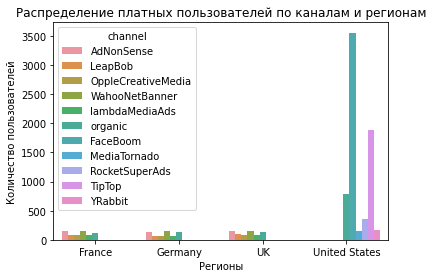

In [40]:
sns.barplot(data = channel_by_region,
           x = 'region',
           y = 'payers',
           hue = 'channel')
plt.xlabel('Регионы')
plt.ylabel('Количество пользователей')
plt.title('Распределение платных пользователей по каналам и регионам')

Часть каналов рынка США и Европы не пересекаются - рассмотрим их отдельно

In [41]:
usa_channels = channel_by_region[channel_by_region['region'] == 'United States'].drop(columns = ['region'])
usa_channels

,channel,payers
18,FaceBoom,3557
19,MediaTornado,156
20,RocketSuperAds,352
21,TipTop,1878
22,YRabbit,165
23,organic,794


In [42]:
eu_channels = (channel_by_region[channel_by_region['region'] != 'United States']
               .drop(columns = ['region'])
               .groupby('channel')
               .agg('sum')).reset_index()
eu_channels

,channel,payers
0,AdNonSense,440
1,LeapBob,262
2,OppleCreativeMedia,233
3,WahooNetBanner,453
4,lambdaMediaAds,225
5,organic,366


[Text(0.5, 1.0, 'Распределение платящих европейских пользователей по рекламным каналам')]

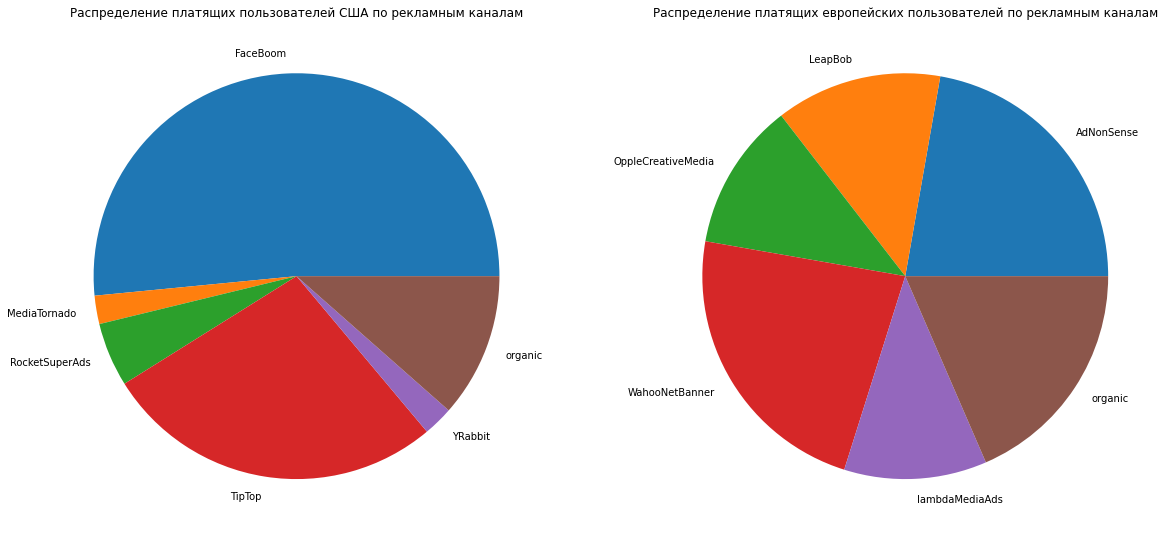

In [43]:
fig, ax = plt.subplots(1, 2, figsize = (20,10), squeeze=False)

ax[0][0].pie(usa_channels['payers'],labels = usa_channels['channel'])
ax[0][0].set(title='Распределение платящих пользователей США по рекламным каналам')

ax[0][1].pie(eu_channels['payers'],labels = eu_channels['channel'])
ax[0][1].set(title='Распределение платящих европейских пользователей по рекламным каналам')


#### Вывод

1. Наибольшую долю пользователей составляют пользоматели из США - 67%. В остальных странах - Великобритания, Германия, Франция - по примерно 11%. Наибольшая доля платящих пользователей по регионам - США - 7%, в остальных странах - по 4%;  
2. Большинство пользователей используют iPhone и Mac, что связано с тем, что такие пользователи из США. Эти же пользователи являются наиболее часто оплачивающими, лишь на 0,5% опережая пользователей Android;
3. Пользователи приходят из 11 каналов, из которых только один существует и на рынке США, и на европейском рынке. На американском рынке наибольший траффик приносят каналы "FaceBoom", "organic" и "TipTop", наибольшая доля платящих пользователей среди каналов - у "FaceBoom" и "organic". На европейском же рынке наибольший трафик приносят "AdNonSense", "WahooNetBanner" и "organic" - при этом меньше половины, но равноценно, новых пользователей приходят из других каналов.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Расходы на рекламу

In [44]:
df_costs['costs'].sum()

105497.30000000002

#### Расходы на каждый рекламный канал

In [45]:
costs_by_channel = df_costs.groupby('channel').sum().sort_values('costs', ascending=False).reset_index()
costs_by_channel['costs_part'] = (costs_by_channel['costs'] / costs_by_channel['costs'].sum()).round(3)
costs_by_channel

,channel,costs,costs_part
0,TipTop,54751.30,0.519
1,FaceBoom,32445.60,0.308
2,WahooNetBanner,5151.00,0.049
3,AdNonSense,3911.25,0.037
4,OppleCreativeMedia,2151.25,0.020
5,RocketSuperAds,1833.00,0.017
6,LeapBob,1797.60,0.017
7,lambdaMediaAds,1557.60,0.015
8,MediaTornado,954.48,0.009
9,YRabbit,944.22,0.009


Как видно из среди оплачиваемых каналов, отсутствует канал "organic", т.е. канал через который приходят пользователи из поисковых систем.

In [46]:
costs_by_channel = costs_by_channel.merge(
    users_by_channel.query('channel != "organic"')[['channel', 'total']], on = 'channel', how = 'left')
costs_by_channel

,channel,costs,costs_part,total
0,TipTop,54751.30,0.519,19561
1,FaceBoom,32445.60,0.308,29144
2,WahooNetBanner,5151.00,0.049,8553
3,AdNonSense,3911.25,0.037,3880
4,OppleCreativeMedia,2151.25,0.020,8605
5,RocketSuperAds,1833.00,0.017,4448
6,LeapBob,1797.60,0.017,8553
7,lambdaMediaAds,1557.60,0.015,2149
8,MediaTornado,954.48,0.009,4364
9,YRabbit,944.22,0.009,4312


[Text(0.5, 1.0, 'Распределение пользователей по рекламным каналам')]

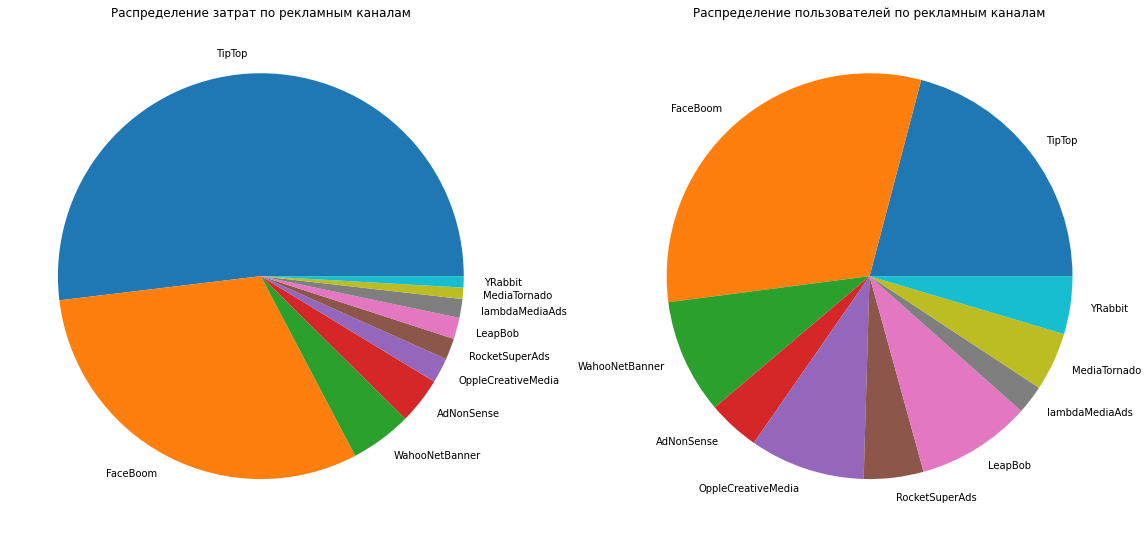

In [47]:
fig, ax = plt.subplots(1, 2, figsize = (20,10), squeeze=False)

ax[0][0].pie(costs_by_channel['costs_part'],labels = costs_by_channel['channel'])
ax[0][0].set(title='Распределение затрат по рекламным каналам')

ax[0][1].pie(costs_by_channel['total'],labels = costs_by_channel['channel'])
ax[0][1].set(title='Распределение пользователей по рекламным каналам')

Text(0.5, 1.0, 'Распределение пользователей по каналам в зависимости от расходов')

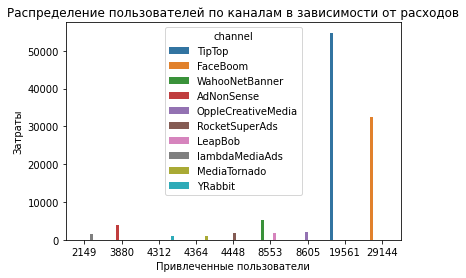

In [48]:
sns.barplot(data = costs_by_channel,
           x = 'total',
           y = 'costs',
           hue = 'channel')
plt.xlabel('Привлеченные пользователи')
plt.ylabel('Затраты')
plt.title('Распределение пользователей по каналам в зависимости от расходов')

Больше половины расходов приходится на каналы "TipTop". Наиболее выгодным оказался канал "FaceBoom". Сумма расходов на него меньше на 20000$, чем на канал "TipTop", а количество новых пользователей больше на 10000.

<function matplotlib.pyplot.show(close=None, block=None)>

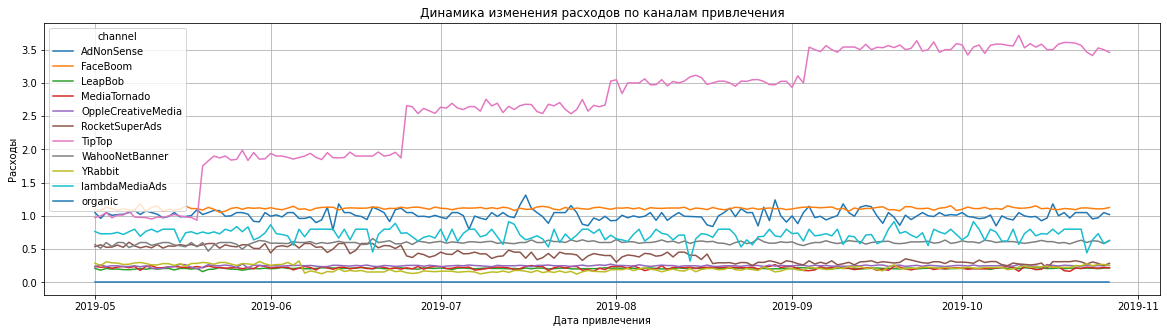

In [49]:
profiles.pivot_table(index='dt',
                    columns='channel',
                    values='acquisition_cost',
                    aggfunc='mean').plot(grid=True, figsize=(20,5))
plt.ylabel('Расходы')
plt.xlabel('Дата привлечения')
plt.title('Динамика изменения расходов по каналам привлечения')
plt.show

По динамике виден рост расходов на рекламу в канале "TipTop" - при этом расходы на рекламу в канале "FaceBom" не изменяются.

In [50]:
df_costs['dt'] = pd.to_datetime(df_costs['dt'])
df_costs['week'] = df_costs['dt'].dt.isocalendar().week
df_costs['month'] = df_costs['dt'].dt.month
df_costs.head(5)

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5


Text(0.5, 1.0, 'Динамика изменения расходов по каналам привлечения по месяцам')

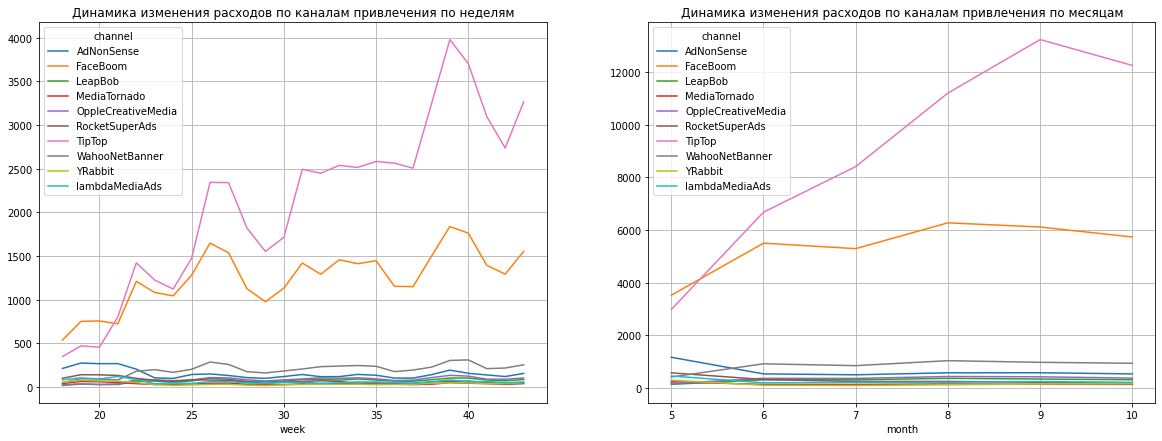

In [51]:
plt.figure(figsize=(20,7))
df_costs.pivot_table(index = 'week',
                    columns = 'channel',
                    values = 'costs',
                    aggfunc = 'sum').plot(grid = True, ax = plt.subplot(1,2,1))
plt.title('Динамика изменения расходов по каналам привлечения по неделям')

df_costs.pivot_table(index = 'month',
                    columns = 'channel',
                    values = 'costs',
                    aggfunc = 'sum').plot(grid = True, ax = plt.subplot(1,2,2))
plt.title('Динамика изменения расходов по каналам привлечения по месяцам')

Расходы на "TipTop" постоянно росли и достигли максимума в сентябре.  
Рассмотри динамику расходов, исключив из рассматриваемого массива крупные каналы.

Text(0.5, 1.0, 'Динамика изменения расходов по каналам привлечения по месяцам')

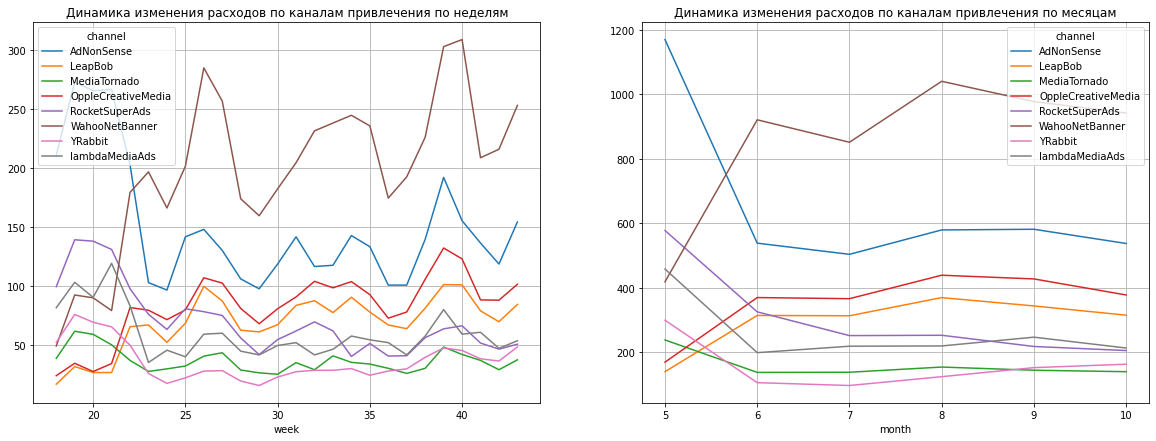

In [52]:
plt.figure(figsize=(20,7))
df_costs.query('channel != "TipTop" and channel != "FaceBoom"').pivot_table(index = 'week',
                    columns = 'channel',
                    values = 'costs',
                    aggfunc = 'sum').plot(grid = True, ax = plt.subplot(1,2,1))
plt.title('Динамика изменения расходов по каналам привлечения по неделям')

df_costs.query('channel != "TipTop" and channel != "FaceBoom"').pivot_table(index = 'month',
                    columns = 'channel',
                    values = 'costs',
                    aggfunc = 'sum').plot(grid = True, ax = plt.subplot(1,2,2))
plt.title('Динамика изменения расходов по каналам привлечения по месяцам')

Средние расходы на каждый канал, кроме "TipTop" и "FaceBoom",  не достигают 1000$ в месяц.

#### Стоимость привлечения одного пользователя (CAC) из каждого источника

Вввиду различия американского и европейского рынков разделим их и будем рассматривать отдельно

In [53]:
users_cost = profiles[profiles['channel'] != 'organic'].groupby(['channel', 'region'])['acquisition_cost'].mean().reset_index()
users_cost

,channel,region,acquisition_cost
0,AdNonSense,France,1.007553
1,AdNonSense,Germany,1.008435
2,AdNonSense,UK,1.008224
3,FaceBoom,United States,1.113286
4,LeapBob,France,0.210189
5,LeapBob,Germany,0.210380
6,LeapBob,UK,0.209983
7,MediaTornado,United States,0.218717
8,OppleCreativeMedia,France,0.249862
9,OppleCreativeMedia,Germany,0.250091


In [54]:
users_cost_usa = users_cost[users_cost['region'] == 'United States'].drop(columns='region')
users_cost_usa.sort_values('acquisition_cost', ascending=False)

,channel,acquisition_cost
12,TipTop,2.799003
3,FaceBoom,1.113286
11,RocketSuperAds,0.412095
16,YRabbit,0.218975
7,MediaTornado,0.218717


In [55]:
users_cost_eu = users_cost[users_cost['region'] != 'United States'].drop(columns='region').groupby('channel').sum().reset_index()
users_cost_eu.sort_values('acquisition_cost', ascending=False)

,channel,acquisition_cost
0,AdNonSense,3.024212
4,lambdaMediaAds,2.174528
3,WahooNetBanner,1.806722
2,OppleCreativeMedia,0.750012
1,LeapBob,0.630552


In [56]:
print(f'Общие затраты на рекламу: {df_costs["costs"].sum():.2f}$')
print(f'Средняя стоимость привлечения пользователя: {users_cost["acquisition_cost"].mean():.2f}$')
print(f'Средняя стоимость привлечения пользователя в США: {users_cost_usa["acquisition_cost"].mean():.2f}$')
print(f'Средняя стоимость привлечения пользователя в Европе: {users_cost_eu["acquisition_cost"].mean():.2f}$')

Общие затраты на рекламу: 105497.30$
Средняя стоимость привлечения пользователя: 0.66$
Средняя стоимость привлечения пользователя в США: 0.95$
Средняя стоимость привлечения пользователя в Европе: 1.68$


#### Вывод

1. Больше половины расходов приходится на канал "TipTop", который приводит в 1,5 меньше пользователей, чем канал "FaceBoom", стоимость привлечения пользователя которого в 2,5 раза меньше. ;  
2. На динамике изменения расходов видно, что расходы на канал "TipTop" растут. В среднем расходы на каждый другой канал, кроме "FaceBoom", не превышает 1000 долларов;
3. Средняя стоимость привлечения пользователя составляет 0.66 долларов. В США это значение достигает 0.95, а в Европе 1.68 - такая разница связана с меньшим количеством пользователей в Европе.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Общая окупаемость рекламы

Из анализа будет исключен канал "organic", так как он не требует расходов.

In [57]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

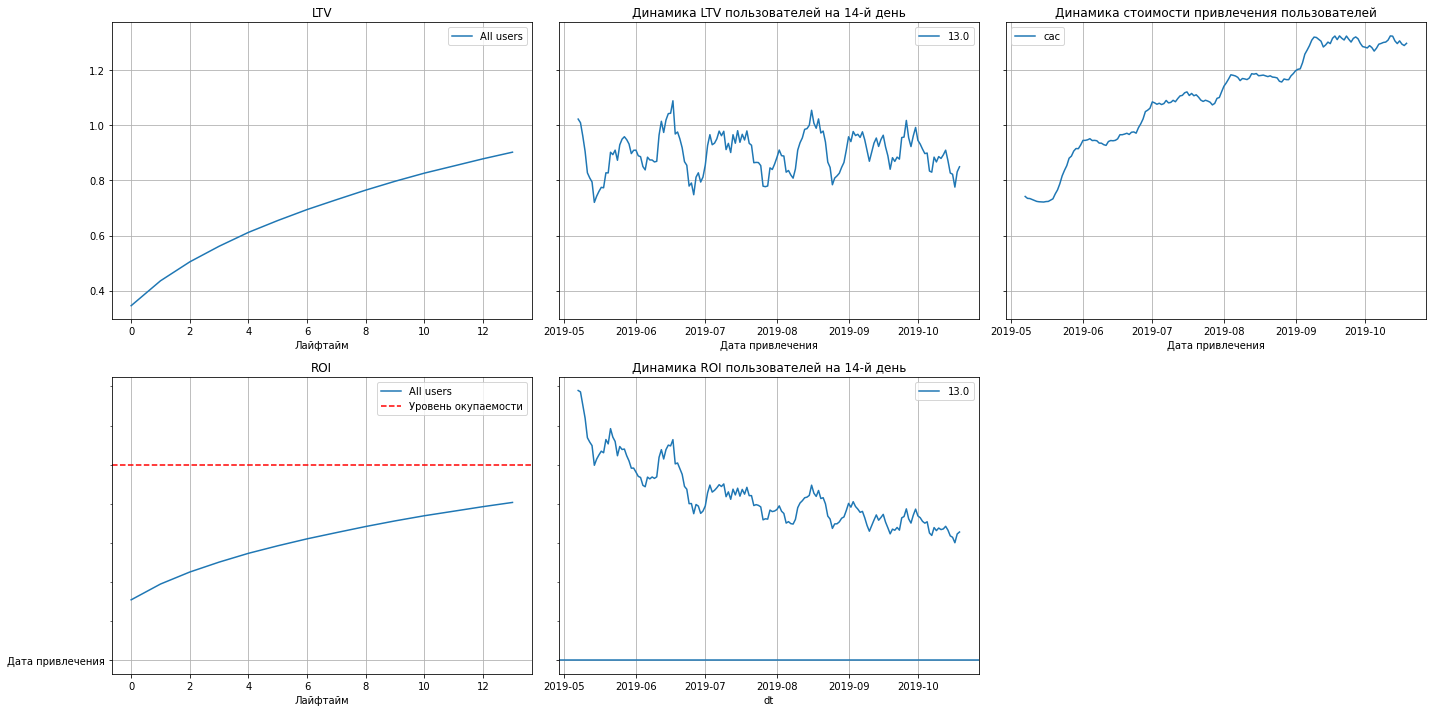

In [58]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles[profiles['channel'] != 'organic'],
                                                                     df_orders, observation_date, horizon_days)
plot_ltv_roi(ltv_grouped,
             ltv_history,
             roi_grouped,
             roi_history,
             horizon_days)

- ROI не достигает уровня окупаемости;  
- CAC растет;  
- LTV стабилен.

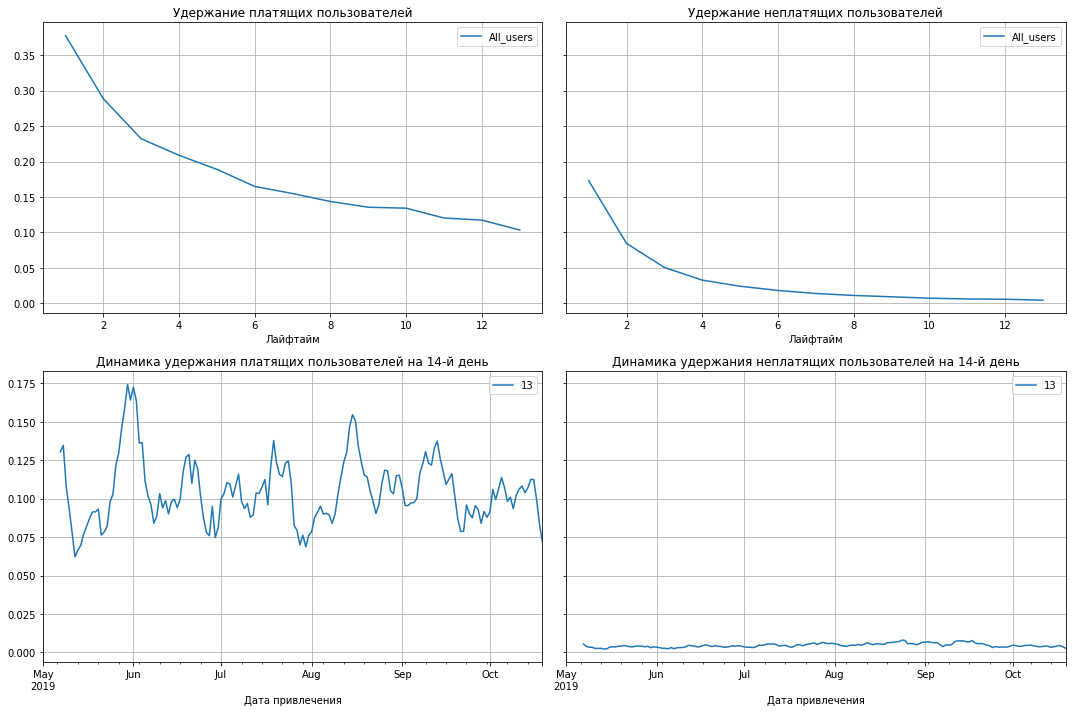

In [59]:
retention_raw, retention_grouped, retention_history = get_retention(profiles[profiles['channel']!='organic'],
                                                                    df_visits[df_visits['channel']!='organic'],
                                                                    observation_date,
                                                                    horizon_days)
plot_retention(retention_grouped, retention_history, horizon_days)

Удержание пользователей падает в течение всего периода наблюдения. Удержание платящих пользователей больше неплатящих на 20%

#### Общая конверсия пользователей

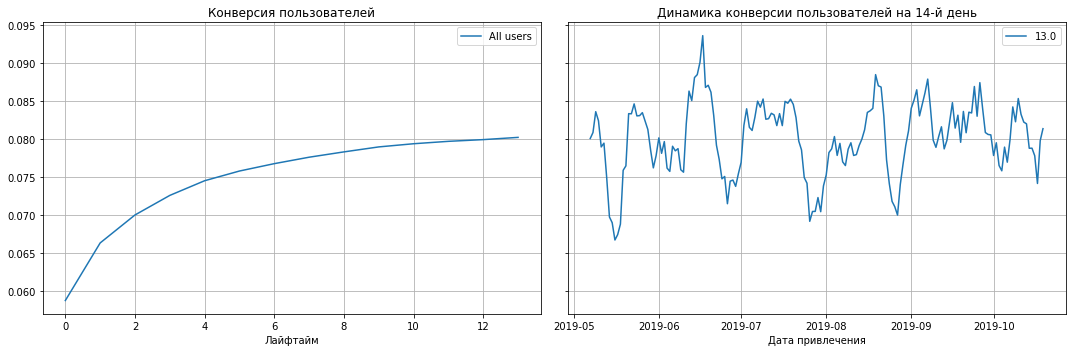

In [60]:
conversion_raw, conversion_grouped, conversion_history, = get_conversion(profiles[profiles['channel'] != 'organic'],
                                                                         df_orders,
                                                                         observation_date,
                                                                         horizon_days)
plot_conversion(conversion_grouped,
                conversion_history,
                horizon_days)

Конверсия растет, однако показатель низкий.

#### Окупаемость рекламы с разбивкой по устройствам

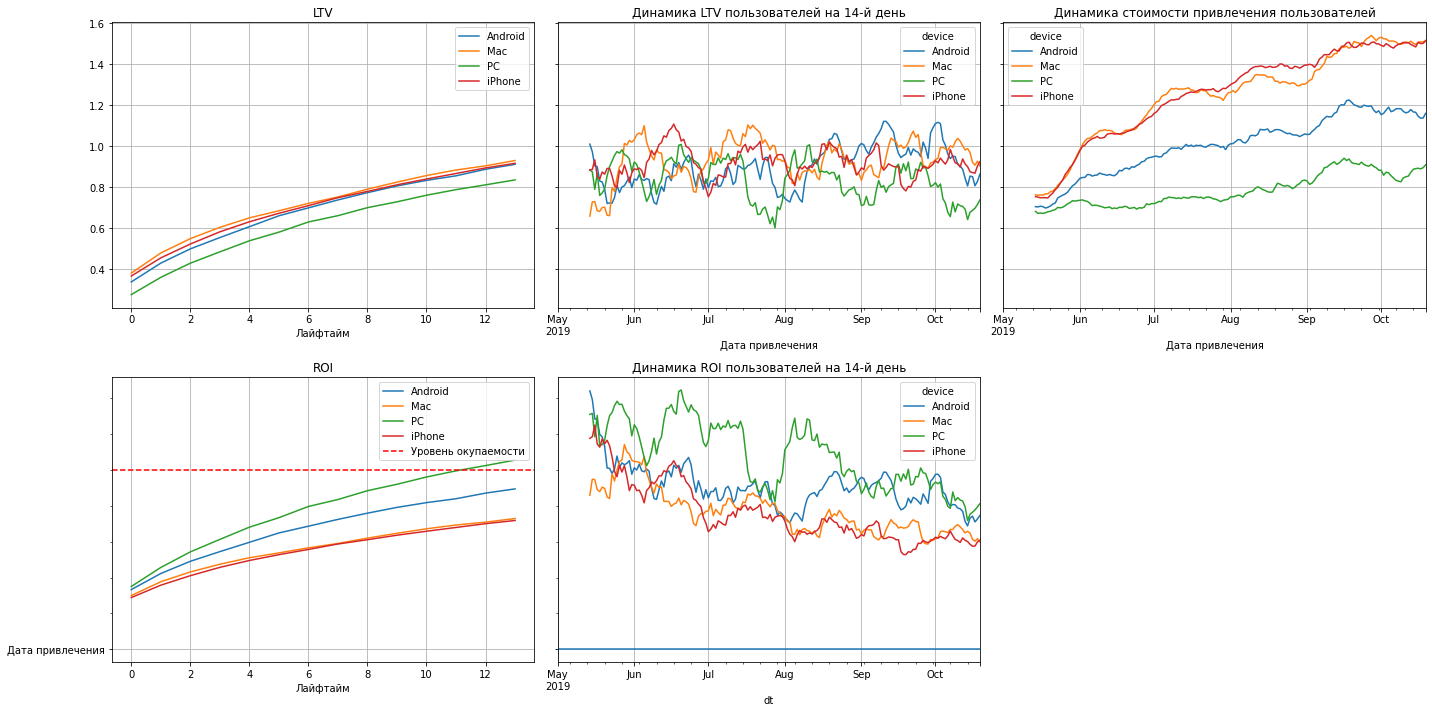

In [61]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles[profiles['channel'] != 'organic'],
                                                                      df_orders,
                                                                      observation_date,
                                                                      horizon_days,
                                                                      dimensions=['device'])
plot_ltv_roi(ltv_grouped,
            ltv_history,
            roi_grouped,
            roi_history,
            horizon_days,
            window=14)

- Реклама окупается только на PC к концу второй недели, а стоимость рекламы для этой платформы наименьшая;  
- Так как LTV для Mac и iPhone растет, то расходы на рекламу для этих платформ не окупается из-за высокой стоимости рекламы.

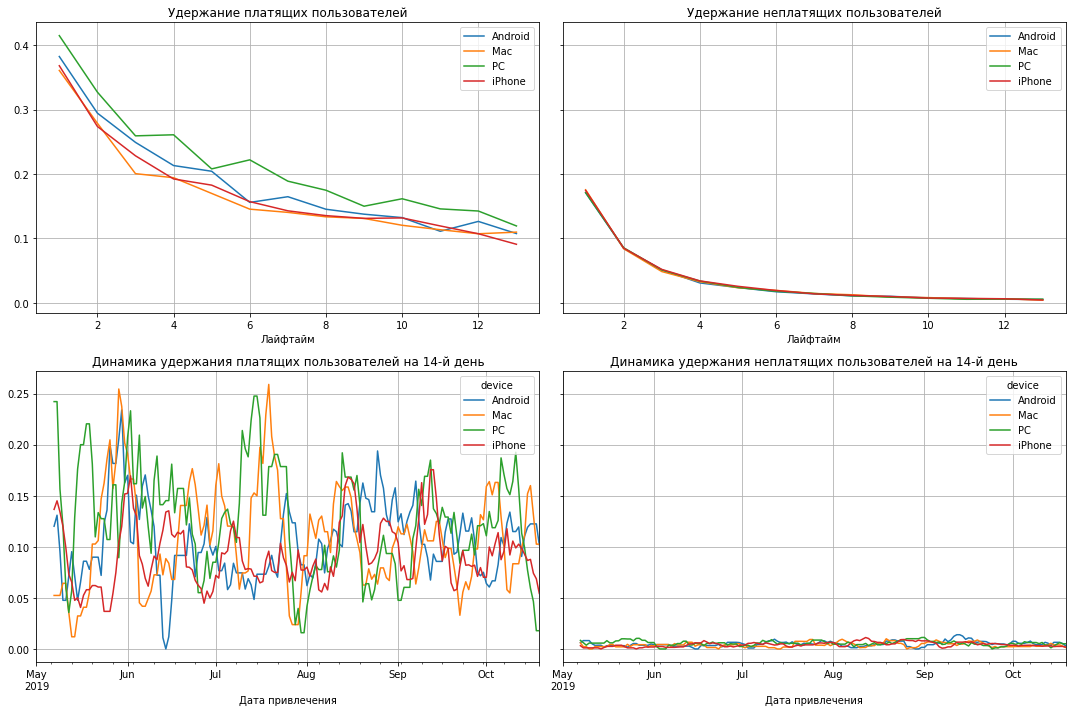

In [62]:
retention_raw, retention_grouped, retention_history = get_retention(profiles[profiles['channel']!='organic'],
                                                                    df_visits[df_visits['channel']!='organic'],
                                                                    observation_date,
                                                                    horizon_days,
                                                                   dimensions=['device'])
plot_retention(retention_grouped, retention_history, horizon_days)

Удержание для пользователей всех устройств практически одинаково и падает.

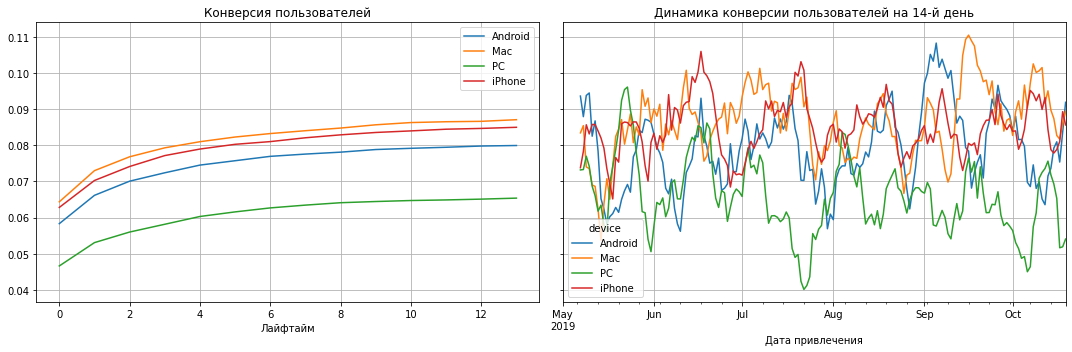

In [63]:
conversion_raw, conversion_grouped, conversion_history, = get_conversion(profiles[profiles['channel'] != 'organic'],
                                                                         df_orders,
                                                                         observation_date,
                                                                         horizon_days,
                                                                         dimensions=['device'])
plot_conversion(conversion_grouped,
                conversion_history,
                horizon_days)

Наилучшую конверсию имеют пользователи iPhone и Mac, однако это не окупает расходы на рекламу

#### Окупаемость рекламы с разбивкой по странам

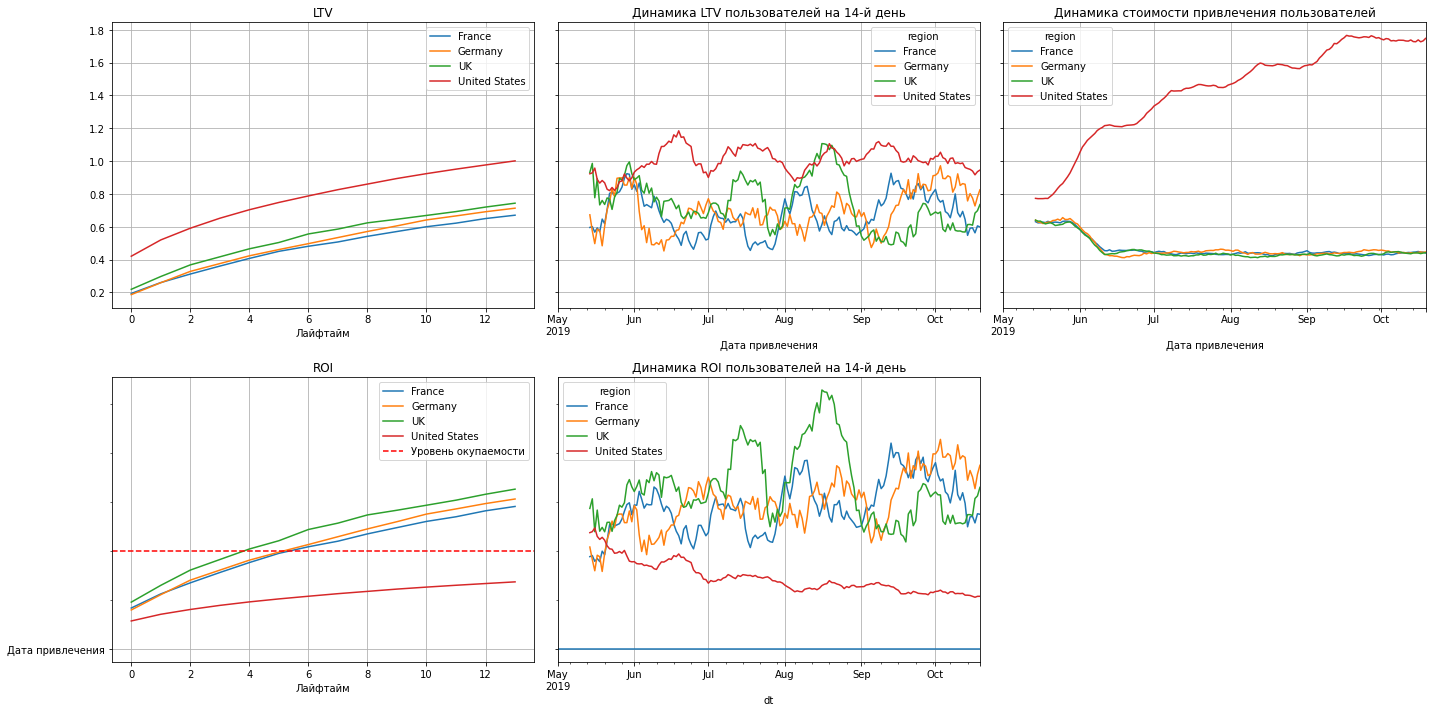

In [64]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles[profiles['channel'] != 'organic'],
                                                                      df_orders,
                                                                      observation_date,
                                                                      horizon_days,
                                                                      dimensions=['region'])
plot_ltv_roi(ltv_grouped,
            ltv_history,
            roi_grouped,
            roi_history,
            horizon_days,
            window=14)

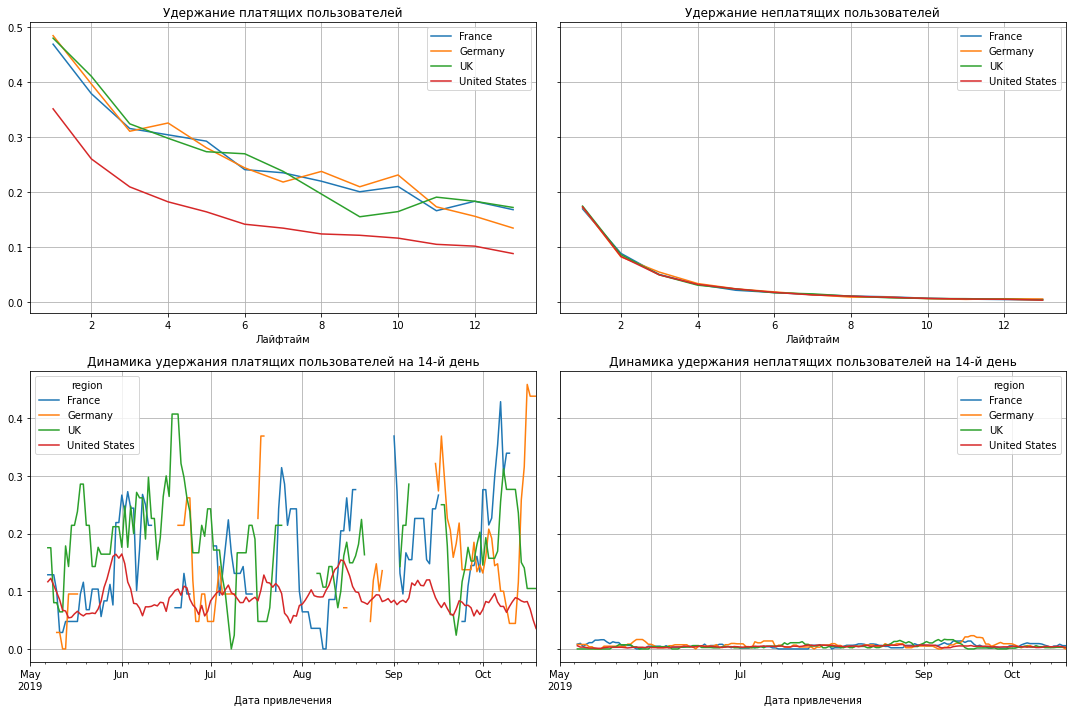

In [65]:
retention_raw, retention_grouped, retention_history = get_retention(profiles[profiles['channel']!='organic'],
                                                                    df_visits[df_visits['channel']!='organic'],
                                                                    observation_date,
                                                                    horizon_days,
                                                                   dimensions=['region'])
plot_retention(retention_grouped, retention_history, horizon_days)

- Реклама в европейских странах окупается на 4-6 день;  
- Реклама в США не окупается;
- CAC в США постоянно растет, а в Европе падает к июню и сохраняет стабильность далее;
- Удержание платящих пользователей на 10% ниже, чем в европейских странах, однако удержание платящих пользователей падает во всех странах в течение всего периода наблюдения. Удержание неплатящих пользователей во всех странах в течение всего периода падает и практически достигает нуля.

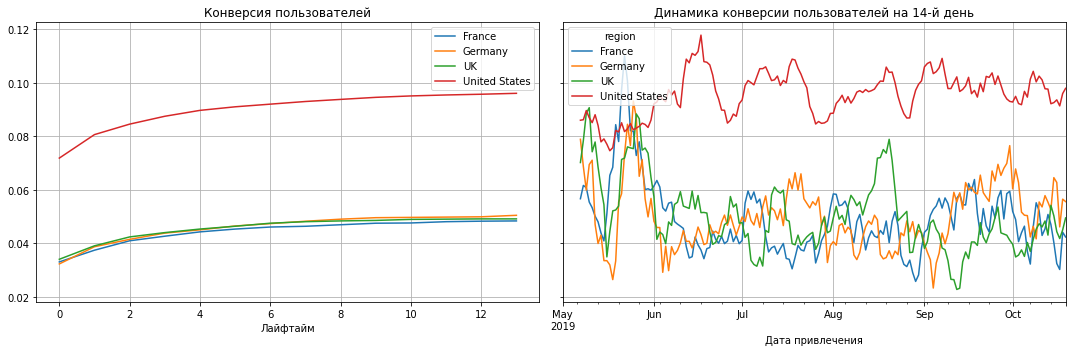

In [66]:
conversion_raw, conversion_grouped, conversion_history, = get_conversion(profiles[profiles['channel'] != 'organic'],
                                                                         df_orders,
                                                                         observation_date,
                                                                         horizon_days,
                                                                         dimensions=['region'])
plot_conversion(conversion_grouped,
                conversion_history,
                horizon_days)

Лучше всего конвертируются пользователи из США, где преобладают пользователи iPhone и Mac 

#### Окупаемость рекламы с разбивкой по каналам

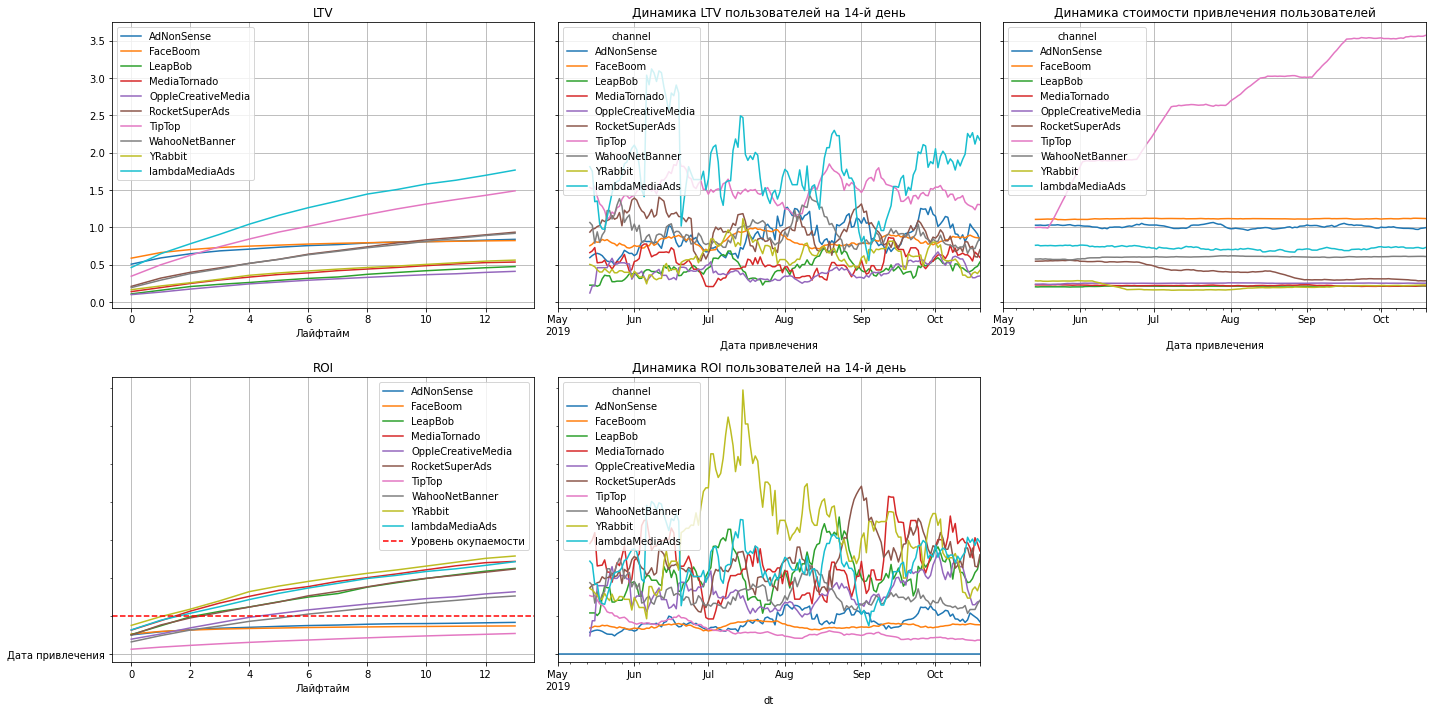

In [67]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles[profiles['channel'] != 'organic'],
                                                                      df_orders,
                                                                      observation_date,
                                                                      horizon_days,
                                                                      dimensions=['channel'])
plot_ltv_roi(ltv_grouped,
            ltv_history,
            roi_grouped,
            roi_history,
            horizon_days,
            window=14)

- Реклама во всех каналах, кроме TipTop, Faceboom и AdNonSense, окупается;  
- CAC для TipTop растет скачкообразно, а для остальных стабилен, кроме RocketSuperAds, который падает.

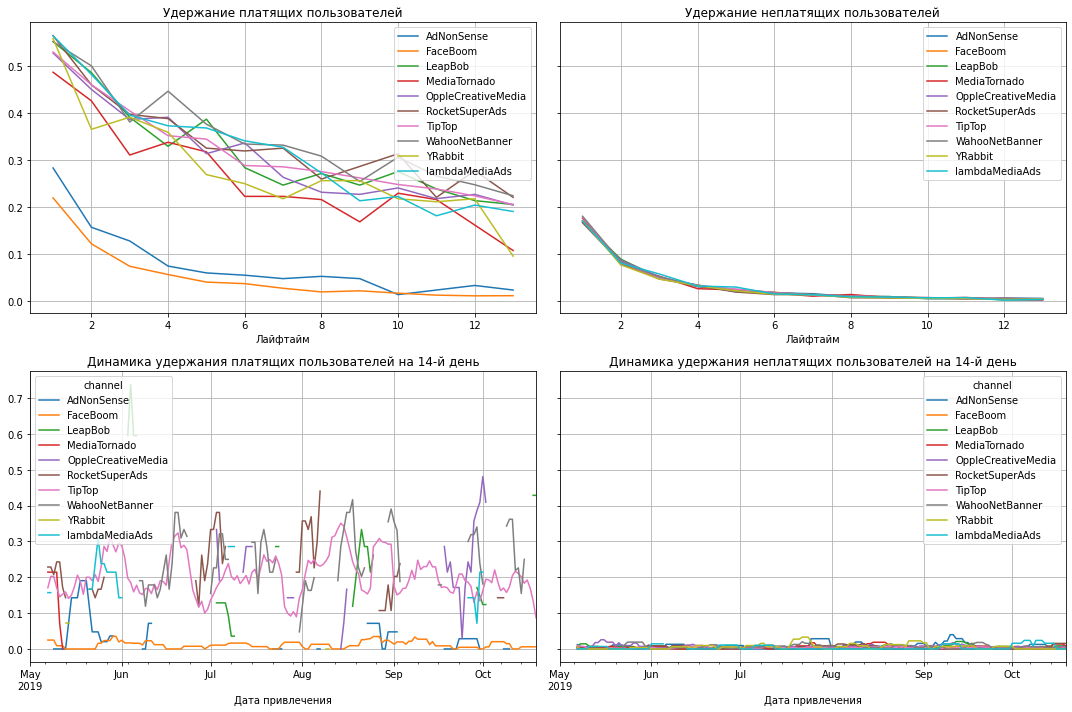

In [68]:
retention_raw, retention_grouped, retention_history = get_retention(profiles[profiles['channel']!='organic'],
                                                                    df_visits[df_visits['channel']!='organic'],
                                                                    observation_date,
                                                                    horizon_days,
                                                                   dimensions=['channel'])
plot_retention(retention_grouped, retention_history, horizon_days)

Хуже всего удерживаются пользователи, пришедшие из каналов "FaceBoom" и "AdNonSense". Удержание пользователей со всех каналов падает в течение всего периода наблюдения.

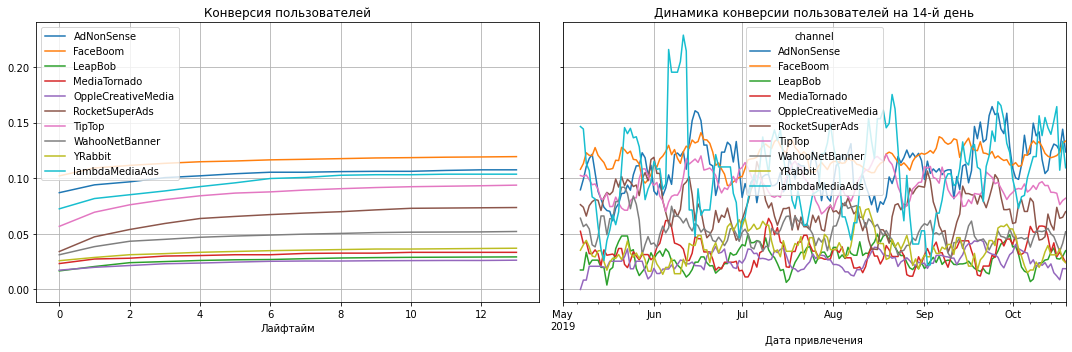

In [69]:
conversion_raw, conversion_grouped, conversion_history, = get_conversion(profiles[profiles['channel'] != 'organic'],
                                                                         df_orders,
                                                                         observation_date,
                                                                         horizon_days,
                                                                         dimensions=['channel'])
plot_conversion(conversion_grouped,
                conversion_history,
                horizon_days)

Наибольшая конверсия наблюдается с каналов, приносящих наибольшую аудиторию в США и Европе:- "FaceBoom" и "AdNonSense", соответственно. Примерно на их уровне располагается конверсия пользователей с канала "lambdaMediaAds". Эта площадка окупается, имеет небольшую стоимость и удерживает пользователей соизмеримо со всеми каналами, кроме "FaceBoom" и "AdNonSense".

#### Вывод

1. Наблюдаются убытки из-за рекламы в каналах AdNonSense, FaceBoom и TipTop;  
2. Стоимость привлечения пользователей TipTop скачкообразно растет;  
3. Реклама для пользователей iPhone, Max и Android не окупается;
4. Стоимость привлечения растет у всех устройств, наибольший рост наблюдается у устройств, которые имеют большинство пользователей;
5. Реклама в США не окупается;  
6. Удержание пользователей падает в течение всего периода наблюдения вне зависимости от канала/региона/устройства. Наихудшее удержание наблюдается по каналам, приносящим наибольшую аудиторию в регионах - "FaceBoom" и "AdNonSense";
7. Наилучшей конверсией обладают клиенты США, где преобладают пользователи iPhone и Mac, привлеченные с каналов "FaceBoom" и "TipTop" - при этом клиенты с "FaceBoom" удерживаются хуже всего. В Европе лучшую конверсию имеют каналы "AdNonSense" и "lambdaMediaAds", где "AdNonSense" имеет наихудшее удержание пользователей, а "lamda MediaAds" соизмеримую с каналам с лучшим удержанием.

#### Вопросы

**Окупается ли реклама, направленная на привлечение пользователей в целом?**

Реклама не окупается. Наибольшую долю пользователей составляют пользователи из США, привлечение которых не окупается из-за траты больше половины средств на каналы с наибольшей стоимостью привлечения пользователя.

**Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?**

- Среди устройств не окупаются устройства iPhone и Mac, пользователи которых составляют большинство аудитории в США;
- Так как большинство клиентов из США, где преобладают пользователи iPhone и Mac, то реклама в данном регионе не окупается.
- Пользователи с каналов "FaceBoom" и "AdNonSense", привлекающие большинство клиентов в соответствующих им регионах, удерживаются хуже всего - при этом расходы на эти каналы входят в тройку самых дорогих каналов, в которые вложены средства. Стоит отдельно отметить канал "TipTop" - расходы на этот канал превышают расходы "FaceBoom", но аудитория с канала "TipTop" в 1,5 меньше канала "FaceBoom", однако удержание аудитории лучше.

**Чем могут быть вызваны проблемы окупаемости?**

Основные проблемы окупаемости связаны с вложением средств в каналы, имеющие наибольшую стоимость привлечения пользователя. При этом удержание пользователей этих каналов хуже, чем у каналов с меньшими расходами

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

#### Предобработка

В массиве данных не было обнаружено пропусков или дубликатов. Названия столбцов были преобразованы в соответствии со snake_case. Были исправлены форматы отображения даты и времени, с самого начала представленные в формате "object".

#### Анализ бизнес показателей

1. В массиве данных представлены клиенты привлеченные в период с 01.05.2019 по 27.10.2019;  
2. Распределение пользователей по странам:
     - Около 67% аудитории приложения составляют пользователи США, остальные пользователи из европейских стран: Великобритания, Франция и Германия - доли клиентов в этих странах варьируются вокруг 11% каждая;  
     - Наибольшую долю платящей аудитории также имеют США - 7%, в странах Европы примерно по 4%;
3. Клиенты пользуются устройствами iPhone, Mac, Android и PC. Наибольшую долю имеют пользователи iPhone и Mac - за счет того, что располаются в США. Характер распределения платящих пользователей такой же, что и всех;
4. Были определены каналы привлечения пользователей. В США наибольшую долю клиентов привлекают каналы "TipTop" и "FaceBoom" - больше всего платящей аудитории принес канал "FaceBoom" - больше половины. 

#### Маркетинговый анализ

1. Общие расходы на рекламу составили 105 497 долларов;  
2. Больше всего расходов в США приходится на канал "TipTop" - больше половины. При этом канал "FaceBoom", привлекающий больше аудитории в 1,5 раза, расходует 1,7 раза больше. Средние расходы на каждый другой канал не достигают 1000 долларов;  
3. Средняя стоимость привлечения пользователей по миру составляет 0.66 доллара. Средняя стоимость привлечения пользователя в США меньше, чем в Европе - 0.95 доллара против 1.68 доллара.

#### Оценка окупаемости рекламы

Реклама не окупает потраченных не нее средств. Удержание пользователей падает в течение всего периода наблюдения. Удержание платящих пользоватлей больше неплатящих на 20%.  
1. Среди всех устройств, которыми пользуются клиенты, окупается только платформа PC, имеющая наилучшее удержание платящих клиентов и наименьшую стоимость привлечения новых пользователей. Пользователи iPhone и Mac имеют наилучшую конверсию, однако это не окупает расходы на рекламу, из-за высокой стоимости привлечения таких пользователей;
2. Так как пользователи из США, где наибольшее распространение имеют устройства iPhone и MAC, составляют большинство аудитории приложения, то реклама в этой стране не окупается, в отличие от стран Европы. При этом удержание платящих пользователей в США на 10% ниже;
3. Реклама окупается во всех каналах, кроме "TipTop", "FaceBoom" и "AdNonSense", окупается. Стоимость удержания пользователей для всех каналов, кроме "TipTop", "YRabbit" и "RocketSuperAds", колеблется вокруг фиксированных значений. Для канала "TipTop" стоимость привлечения пользователей скачкообразно растет, а для каналов "RocketSuperAds" и "YRabbit" падает и остается на фиксированном значении. При этом удержание пользователей для каналов, приносящих большинство аудитории в регионах, является наименьшим - каналы "FaceBoom" и "AdNonSense". Наилучшей конверсией обладают пользователи "FaceBoom", "AdNonSense" и "lambdaMediaAds".

#### Общий вывод

Реклама приложения не окупается. Удержание аудитории малое, так как аудитория завлекается только на короткий промежуток времени.

Стоимость рекламы для пользователей iPhone и Mac, т.е. как и для пользователей из США, все время увеличивается. Такие клиенты имеют хорошую конверсию, но реклама не окупается из-за повышающейся стоимости привлечения. При этом удержание платящей аудитории является худшим среди представленных. Следует пересмотреть стратегию удержания пользователей, например, проведение акций, обновление функционала или сфокусироваться на определенной аудитории.  

Следует рассмотреть перераспределение расходов на рекламные каналы, например, "RocketSuperAds" в США, где CAC падает на протяжении периода наблюдения, и "lambdaMediaAds" в Европе, а также "YRabbit". Эти каналы имеют малую стоимость привлечения пользователей, а удержание пользователей с канала "lambdaMediaAds" наибольшее среди альтернатив. Следует значительно сократить расходы на канал "TipTop", который имеет наибольшую стоимость привлечения и предоставляет меньше аудитории, чем более дешевый "FaceBoom". "FaceBoom" и "AdNonSense" имеют более низкую стоимость привлечения пользователей, но самую низкую представляют наименьшее удержание, что говорит о том, что эти каналы привлекают аудиторию только за счет рекламы, но дальнейшее использование приложения не удовлетворяет их потребностям. Следует провести анализ того, что привлекает таких пользователей и сделать фокус на этой сфере, изменив функционал под их потребности, или рассмотреть перераспределение расходов на другие каналы, с которых удержание аудитории является наибольшим, а конверсия не сильно уступает предыдущим основным каналам, например, канал "labdaMediaAds".